In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x = np.empty((100, 2))
x[:,0] = np.random.uniform(0.,100., size=100)
x[:,1] = 0.75 * x[:,0] + 3.0 + np.random.normal(0, 5, size=100)

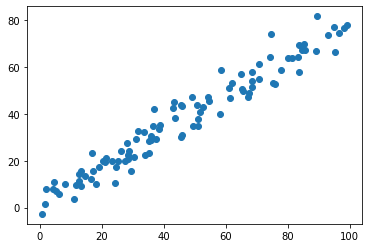

In [3]:
plt.scatter(x[:, 0], x[:,1])
plt.show()

In [4]:
from sklearn.decomposition import PCA

In [5]:
pca = PCA(n_components=1)
pca.fit(x)
x_reduction = pca.transform(x)
x_restore = pca.inverse_transform(x_reduction)

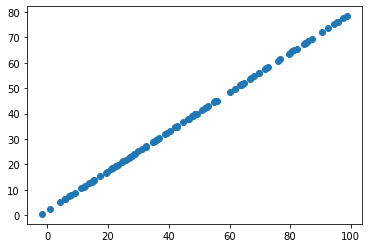

In [6]:
plt.scatter(x_restore[:, 0], x_restore[:,1])
plt.show()

### 手写识别的降噪例子

In [7]:
from sklearn import datasets

digits = datasets.load_digits()
x = digits.data
y = digits.target

In [8]:
noisy_digits = x + np.random.normal(0, 4, size=x.shape)

In [23]:
example_digits = noisy_digits[y ==0,:][:10]
for num in range(1, 10):
    x_num = noisy_digits[y==num, :][:10]
    example_digits=np.vstack([example_digits, x_num])

In [24]:
example_digits

array([[-3.29098587, -4.24993937,  3.228258  , ..., -0.6755555 ,
        -0.23409531,  0.65217219],
       [ 0.02111405, -3.86140723, -1.06011494, ...,  2.11960477,
         2.11766137,  0.35216765],
       [-3.65967776,  1.10891585,  0.29869108, ...,  3.03502849,
         5.06941917,  1.96833399],
       ...,
       [-5.06498076, -4.27923859,  9.75441459, ..., 12.70340406,
         1.72008137,  1.18846072],
       [ 0.68422993, -0.32308259, 10.82641701, ..., 13.73231275,
        -2.81705347,  1.30242632],
       [-3.53365154,  0.85818993, 11.32507308, ...,  5.07249054,
         1.74255849, -4.47061972]])

In [26]:
example_digits.shape

(100, 64)

In [30]:
def plot_digits(data):
    fig, axes = plt.subplots(10, 10, figsize = (10,10), subplot_kw={'xticks':[],'yticks':[]}, gridspec_kw=dict(hspace=0.1, wspace=0.1))
    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(8, 8), cmap='binary', interpolation='nearest', clim=(0, 16))
    plt.show()

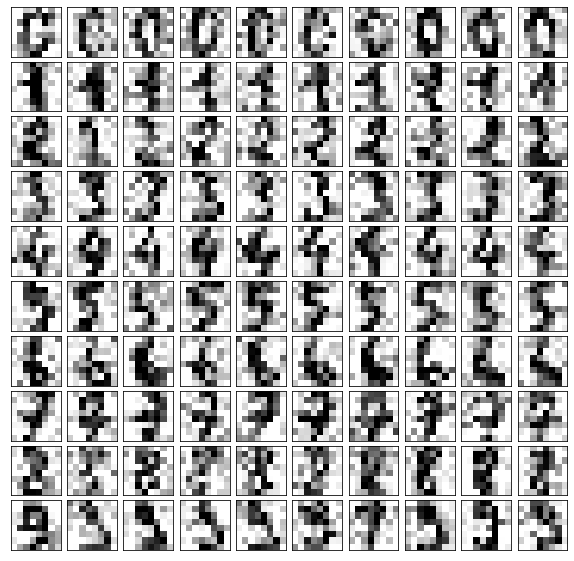

In [31]:
plot_digits(example_digits)

In [32]:
pca = PCA(0.5)
pca.fit(noisy_digits)

PCA(n_components=0.5)

In [33]:
pca.n_components_

12

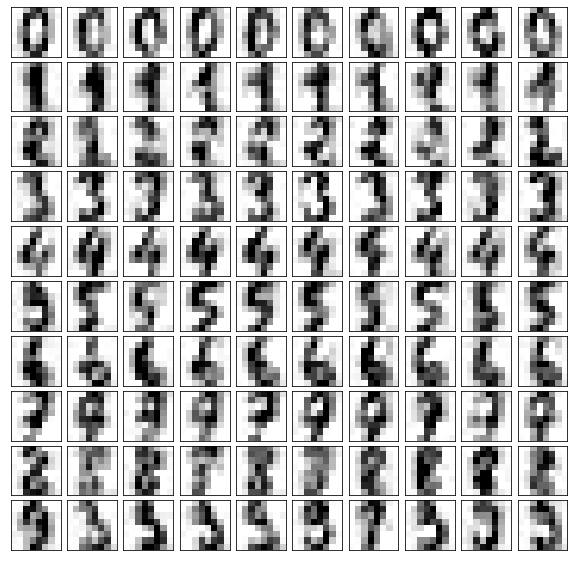

In [34]:
components = pca.transform(example_digits)
filtered_digits = pca.inverse_transform(components)
plot_digits(filtered_digits)